# *File name:* **4_A_Sine_Fit.ipynb**

## Code to fit a function to a data using gradient descent

In [15]:
import numpy as np
import matplotlib.pyplot as plt

### Input parameters:   $(A,m,\phi,c)$

<div style="border: 2px solid #535353; width: 820px; padding: 10px; background-color: #f2f2f2; border-radius: 8px;">
<div style="background-color: white; padding: 10px; border-radius: 5px; max-width: 800px; overflow: auto;">

 $$
 y = A \; \sin(m \: x + \phi) + c
 $$

 </div>
 </div>

In [16]:
A = 0.5        # Slope
m = 1          # Intercept
phi = np.pi/3  # Phase
c = 1.0        # Vertical shift

### Data generation:

In [17]:
L = 2*np.pi      # Range of x is [0,L]
Np = 200     # Number of data points

In [18]:
x = L * np.random.rand(Np)
y = A * np.sin(m * x + phi) + c

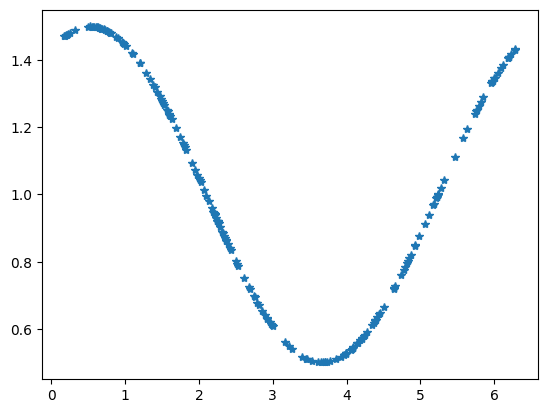

In [19]:
plt.plot(x,y,'*')
plt.show()

### Add noise to data: $ y \rightarrow y + \xi $

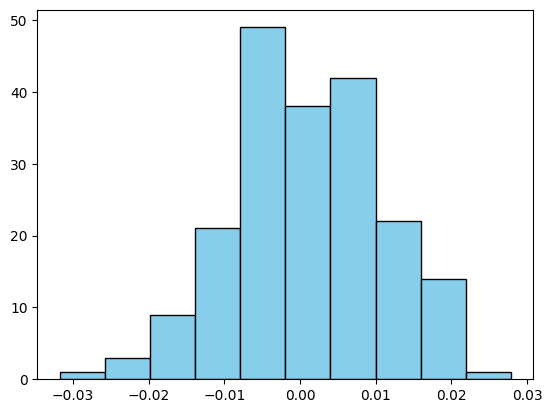

In [20]:
xi = 0.01 * np.random.randn(Np)

plt.hist(xi, bins=10, color='skyblue', edgecolor='black')
plt.show()

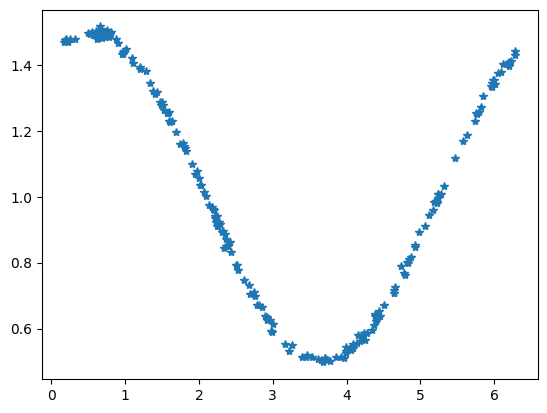

In [21]:
y = y + xi
plt.plot(x,y,'*')
plt.show()

### Initial guess: $(m_0,c_0)$

In [22]:
A0 = 0.5
m0 = 1.5
phi0 = 0 #np.pi/2.0
c0 = 0 #0.5

### Loss function:

<div style="border: 2px solid #535353; width: 820px; padding: 10px; background-color: #f2f2f2; border-radius: 8px;">
<div style="background-color: white; padding: 10px; border-radius: 5px; max-width: 800px; overflow: auto;">

$$
E(A,m,\phi,c) = \frac{1}{N_p} \sum_{i=1}^{N_p} [y_i - ( A \; \sin(m \: x_i + \phi) + c)]^2 
$$

</div>
</div>

### Gradient:

<div style="border: 2px solid #535353; width: 820px; padding: 10px; background-color: #f2f2f2; border-radius: 8px;">
<div style="background-color: white; padding: 10px; border-radius: 5px; max-width: 800px; overflow: auto;">

$$ 
E(A,m,\phi,c) = \frac{1}{N_p} \sum_{i=1}^{N_p} (y_i - ( A \; \sin(m \: x_i + \phi) + c))^2 
$$
$$
\frac{\partial E}{\partial A} = - \frac{2}{N_p} \sum_{i=1}^{N_p} (y_i-(A \sin(m x_i + \phi)+c)) \; \sin(m x_i + \phi)
$$
$$
\frac{\partial E}{\partial m} = - \frac{2}{N_p} \sum_{i=1}^{N_p} A \; (y_i-(A \sin(m x_i + \phi)+c)) \; \cos(m x_i + \phi) \; x_i
$$
$$
\frac{\partial E}{\partial \phi} = - \frac{2}{N_p} \sum_{i=1}^{N_p} A \; (y_i-(A \sin(m x_i + \phi)+c)) \; \cos(m x_i + \phi)
$$
$$
\frac{\partial E}{\partial c} = - \frac{2}{N_p} \sum_{i=1}^{N_p} (y_i-(A \sin(m x + \phi)+c))
$$

</div>
</div>

### Gradient descent:

<div style="border: 2px solid #535353; width: 420px; padding: 10px; background-color: #f2f2f2; border-radius: 8px;">
<div style="background-color: white; padding: 10px; border-radius: 5px; max-width: 400px; overflow: auto;">

$$
\begin{align*}
A \; & \rightarrow & A - \eta \: \frac{\partial E}{\partial A} \\
m \; & \rightarrow & m - \eta \: \frac{\partial E}{\partial m} \\
\phi \; & \rightarrow & \phi - \eta \: \frac{\partial E}{\partial \phi} \\
c \; & \rightarrow & c - \eta \: \frac{\partial E}{\partial c}
\end{align*}
$$

</div>
</div>

In [23]:
eta = 0.01  # Learning rate
n_iter = 20000

A_curr = A0
m_curr = m0
phi_curr = phi0
c_curr = c0

AA = np.zeros(n_iter)
mm = np.zeros(n_iter)
pp = np.zeros(n_iter)
cc = np.zeros(n_iter)
EE = np.zeros(n_iter)

for it in range(n_iter):
    AA[it] = A_curr
    mm[it] = m_curr
    pp[it] = phi_curr
    cc[it] = c_curr
    EE[it] = np.sum((y - (A_curr * np.sin(m_curr * x + phi_curr) + c_curr))**2) / Np

    dE_dA = 0
    dE_dm = 0
    dE_dphi = 0
    dE_dc = 0

    for i in range(Np):
        dE_dA += -2 * np.sin(m_curr * x[i] + phi_curr) * (y[i] - (A_curr * np.sin(m_curr * x[i] + phi_curr) + c_curr)) / Np
        dE_dm += -2 * A_curr * x[i] * np.cos(m_curr * x[i] + phi_curr) * (y[i] - (A_curr * np.sin(m_curr * x[i] + phi_curr) + c_curr)) / Np
        dE_dphi += -2 * A_curr * np.cos(m_curr * x[i] + phi_curr) * (y[i] - (A_curr * np.sin(m_curr * x[i] + phi_curr) + c_curr)) / Np
        dE_dc += -2 * (y[i] - (A_curr * np.sin(m_curr * x[i] + phi_curr) + c_curr)) / Np

    A_curr = A_curr - eta * dE_dA
    m_curr = m_curr - eta * dE_dm
    phi_curr = phi_curr - eta * dE_dphi
    c_curr = c_curr - eta * dE_dc

In [24]:
A,A_curr,m,m_curr,phi,phi_curr,c,c_curr

(0.5,
 np.float64(0.498787868582366),
 1,
 np.float64(1.007770559178447),
 1.0471975511965976,
 np.float64(1.0173080547794684),
 1.0,
 np.float64(0.9970862708045545))

### Compare the results:

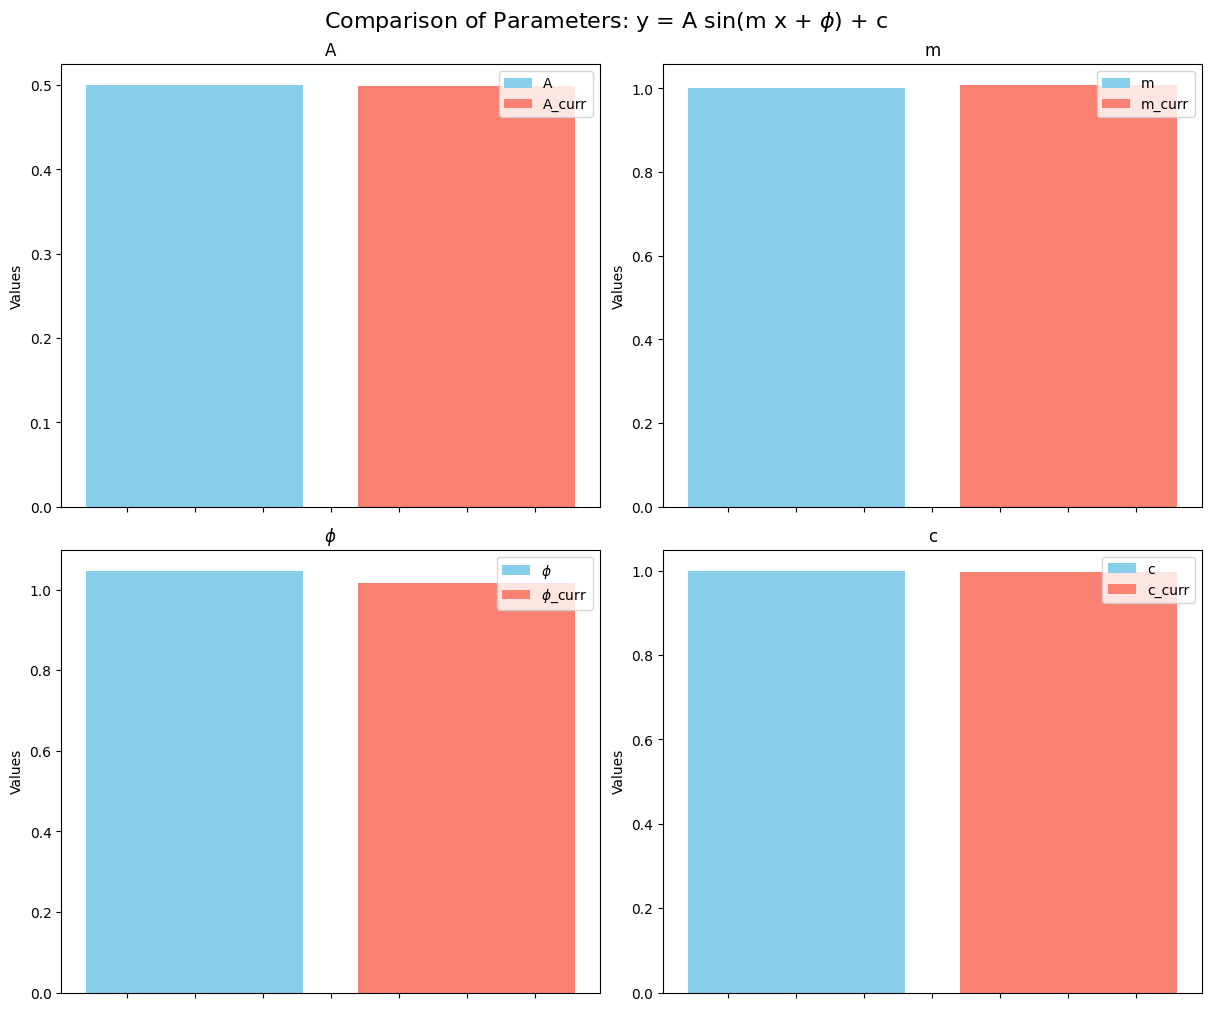

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10), layout='constrained')

axs[0, 0].bar([0,1], [A,A_curr], width=0.8, label=['A','A_curr'], color=['skyblue','salmon'])
axs[0, 0].set_title('A')
axs[0, 0].set_ylabel('Values')
axs[0, 0].set_xticklabels([])
axs[0, 0].legend()

axs[0, 1].bar([0,1], [m,m_curr], width=0.8, label=['m','m_curr'], color=['skyblue','salmon'])
axs[0, 1].set_title('m')
axs[0, 1].set_ylabel('Values')
axs[0, 1].set_xticklabels([])
axs[0, 1].legend()

axs[1, 0].bar([0,1], [phi,phi_curr], width=0.8, label=['$\phi$','$\phi$_curr'], color=['skyblue','salmon'])
axs[1, 0].set_title('$\phi$')
axs[1, 0].set_ylabel('Values')
axs[1, 0].set_xticklabels([])
axs[1, 0].legend()

axs[1, 1].bar([0,1], [c,c_curr], width=0.8, label=['c','c_curr'], color=['skyblue','salmon'])
axs[1, 1].set_title('c')
axs[1, 1].set_ylabel('Values')
axs[1, 1].set_xticklabels([])
axs[1, 1].legend()

fig.suptitle('Comparison of Parameters: y = A sin(m x + $\phi$) + c', fontsize=16)

# Display the plots
plt.show()


### The solution:

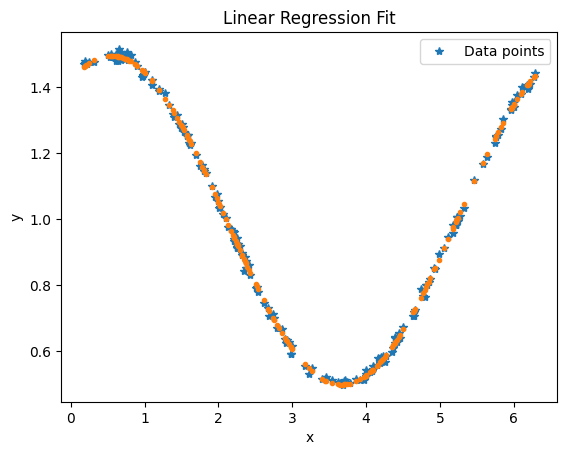

In [26]:
plt.plot(x,y,'*', label='Data points')
y_fit = A_curr * np.sin(m_curr * x + phi_curr) + c_curr
plt.plot(x, y_fit,'.')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

### Generate a GIF of the line fit's evolution

In [27]:
# Generate a GIF of the line fit's evolution
import imageio
import imageio.v3 as iio

images = []

for i in range(0, n_iter, n_iter//10):
    plt.plot(x,y,'*', label='Data points')
    y_fit = AA[i] * np.sin(mm[i] * x + pp[i]) + cc[i]
    plt.plot(x, y_fit, 'r.', label=f'Iter {i}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Fit')
    plt.legend()
    
    filename = 'Fig/tmp.png'
    plt.savefig(filename)
    images.append(imageio.imread(filename))
    plt.close()

iio.imwrite(
    'Fig/fit_evolution.gif',
    images,
    duration=200,  # Duration of each frame in milliseconds (e.g., 200ms = 0.2 seconds)
    loop=0         # 0 means the GIF will loop indefinitely
)

/tmp/ipykernel_2423087/3066213570.py:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


![Fit evolution](Fig/fit_evolution.gif)

### Evolution of energy:

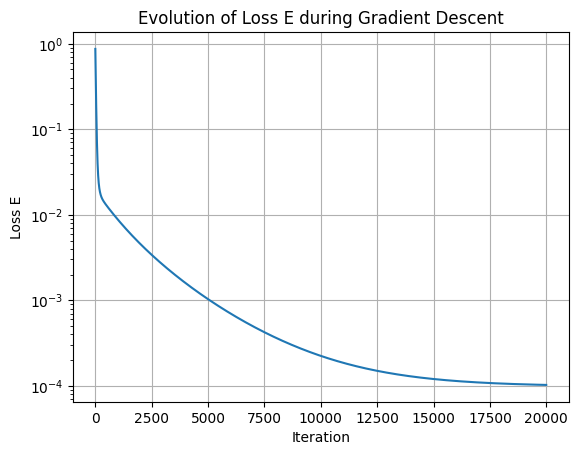

In [28]:
plt.plot(range(n_iter), EE)
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Loss E')
plt.title('Evolution of Loss E during Gradient Descent')
plt.grid(True)
plt.show()